In [36]:
import seaborn as sns
df=sns.load_dataset('tips') #preloaded dataset of seaborn like titanic,iris,penguins,diamonds,
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [37]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [39]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [40]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [41]:
correlation=df.corr(numeric_only=True) #range of correlation +1 to -1 
#only numerical columns can be displayed
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

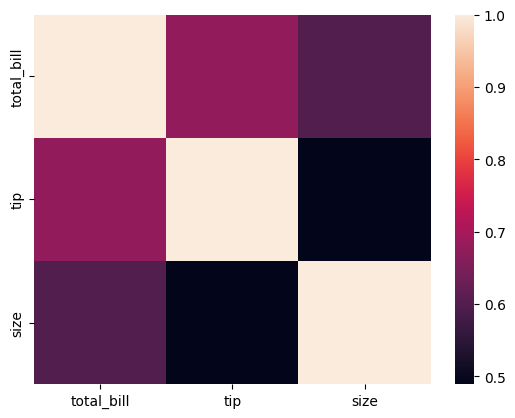

In [42]:
sns.heatmap(correlation) #cmap='coolwarm' color mapping 
#light color-strong correlation & dark color- weak correlation
#OR
#sns.heatmap(correlation,cmap='coolwarm')

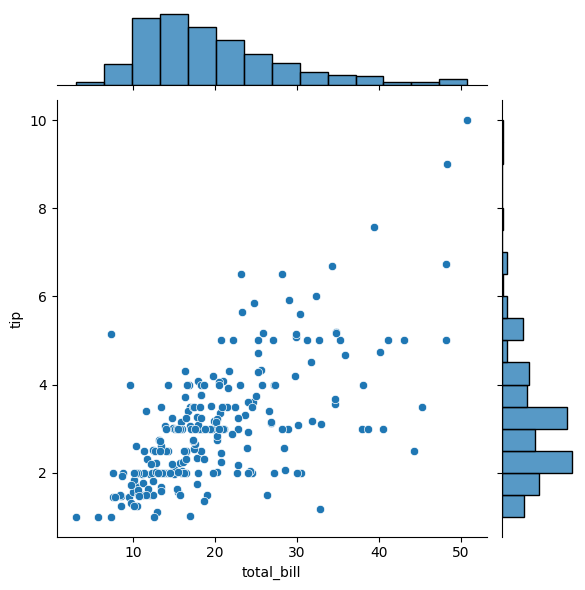

In [43]:
sns.jointplot(x='total_bill',y='tip',data=df) #Scatter plot and histogram joined correlation #Jointplot numericsl columns only
#sns.jointplot(x='total_bill',y='tip',data=df,kind='reg')#kind='hex'    'reg'

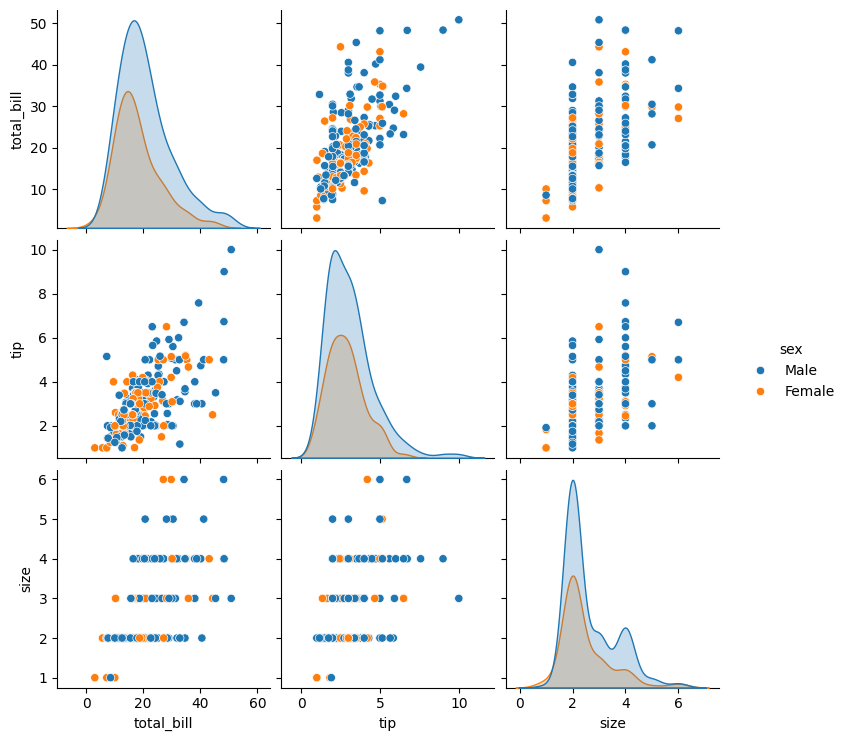

In [44]:
sns.pairplot(df,hue='sex') #'sex' shows in diff color

<Axes: xlabel='day', ylabel='count'>

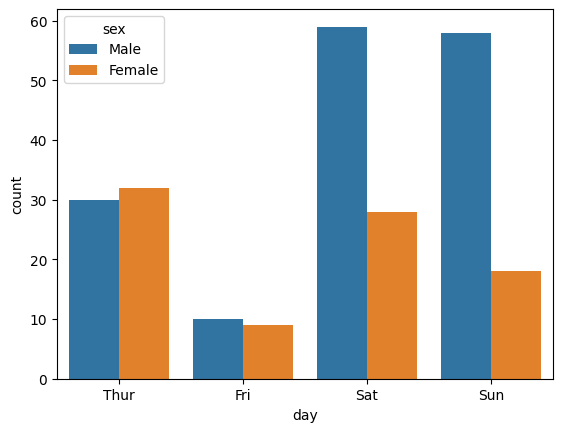

In [45]:
#sns.countplot(x='sex',data=df) #Only for Categorical columns
sns.countplot(x='day',data=df,hue='sex')#day wise

<Axes: xlabel='total_bill', ylabel='day'>

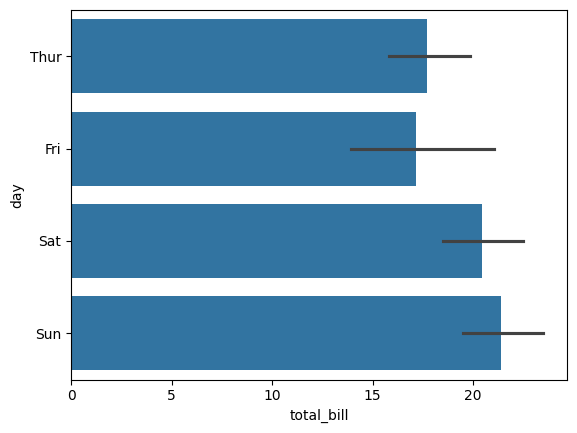

In [46]:
sns.barplot(x='total_bill',y='day',data=df)

<Axes: xlabel='smoker', ylabel='total_bill'>

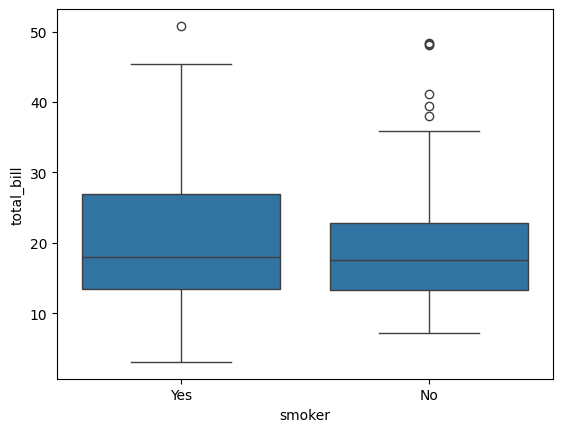

In [47]:
#6.Boxplot
#Used to find Oulier
#Q1==>25th percentile
#Q2==>Median
#Q3==>75th Percntile
#Whiskers==> Line extending from the box
#upper whisker==>Maximum value
#lower whisker==>Minimum value
sns.boxplot(x='smoker',y='total_bill',data=df)

In [48]:
df['total_bill'].unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 13.81, 11.02, 17.59,
       20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28,
       14.73, 10.51, 27.2 , 22.76, 17.29, 19.44, 16.66, 10.07, 32.68,
       15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49,  5.75,
       16.32, 22.75, 40.17, 27.28, 12.03, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69,
       13.42, 14.26, 15.95, 12.48, 29.8 ,  8.52, 14.52, 11.38, 22.82,
       19.08, 20.27,

<Axes: ylabel='total_bill'>

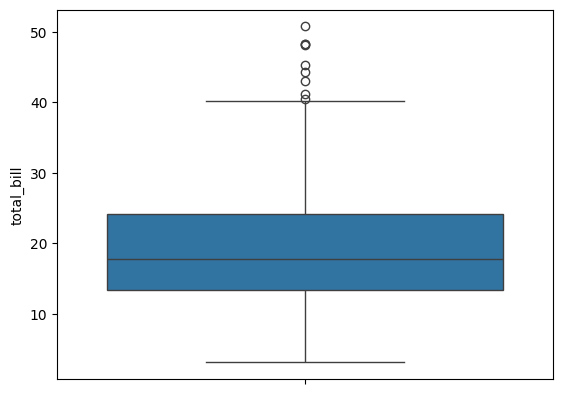

In [49]:
sns.boxplot(y='total_bill',data=df)

<Axes: xlabel='time', ylabel='total_bill'>

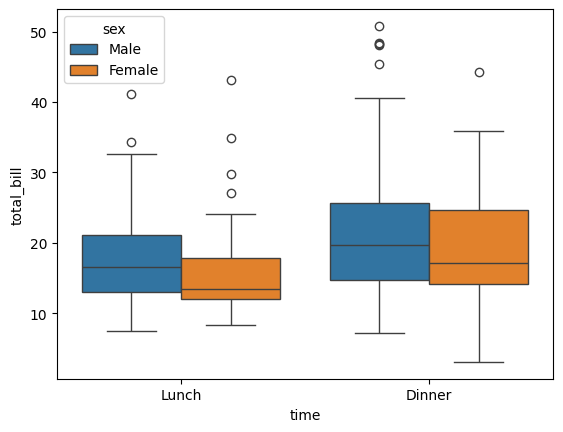

In [50]:
sns.boxplot(x='time',y='total_bill',hue='sex',data=df)

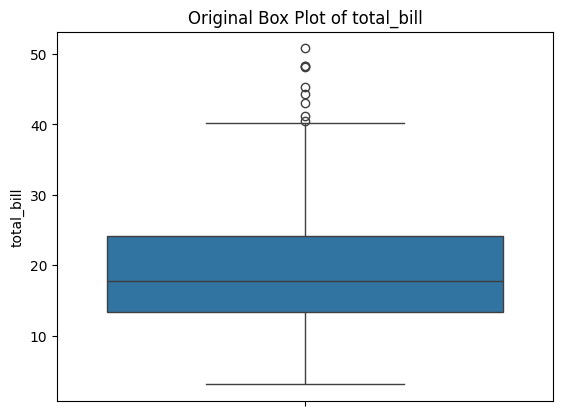

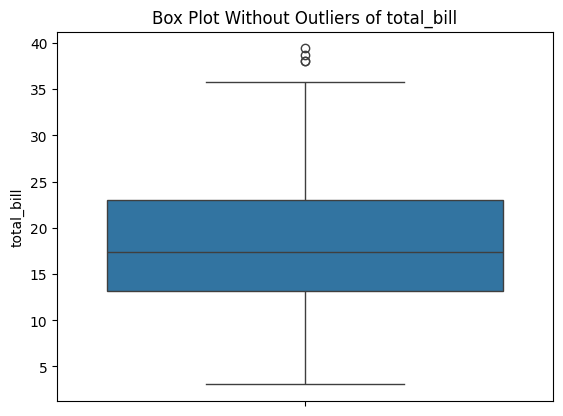

In [51]:
import matplotlib.pyplot as plt
def removal_box_plot(df,column,threshold): #Arguments
    sns.boxplot(df[column]) #df['total_bill']  #sns.boxplot(df['total_bill])
    plt.title(f'Original Box Plot of {column}') #40
    plt.show()
    removed_outliers=df[df[column]<=threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot Without Outliers of {column}')
    plt.show()
    return removed_outliers

threshold_value=40
no_outliers=removal_box_plot(df,'total_bill',threshold_value)

In [52]:
import numpy as np
Q1=np.percentile(df['total_bill'],25,method='midpoint') #Q1
Q3=np.percentile(df['total_bill'],75,method='midpoint') #Q3
IQR=Q3-Q1
print(IQR)

10.849999999999998


In [53]:
upper=Q3+1.5*IQR
upper_array=np.array(df['total_bill']>=upper) #[1,2,3,4]
print("Upper Bound: ",upper)
print(upper_array.sum())

#Below Lower Bound
lower=Q1-1.5*IQR
lower_array=np.array(df['total_bill']<=lower)
print('Lower Bound: ',lower)
print(lower_array.sum())

Upper Bound:  40.449999999999996
9
Lower Bound:  -2.9499999999999993
0
